# Safety Violation Detection System

## Verify Dataset Structure

In [1]:
import os

# Define dataset path
dataset_path = '/kaggle/input/latest'

# List files and directories
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')


latest/
    README.dataset.txt
    README.roboflow.txt
    data.yaml
    valid/
        labels/
            IMG_5353_JPG.rf.e257aa0bc6fee70cfef85f3159ff3a57.txt
            IMG_4197-2_JPG.rf.a7a577ec6e2b11ade9f700a950816898.txt
            IMG_4758_JPG.rf.863d3f4f3c12ff36aa3cedc3173129b3.txt
            using-her-phone-for-business_jpg.rf.4fc0b02d38156a2409209c7020e01265.txt
            carpenter-cutting-a-wooden-board_jpg.rf.b6afbd83d05e59d356b8227516186864.txt
            115_jpg.rf.afc62d9be33400168dfccad650d4af40.txt
            IMG_5493_JPG.rf.5c9f942f13c0b534876a3cfe350650bf.txt
            IMG_4173_JPG.rf.2116025067dfc7675f330eed85815cbf.txt
            comparing-the-drafts_jpg.rf.8eed7686934a94ea064f9c217e57dcb7.txt
            IMG_4636_JPG.rf.935fb7b5928a392b69b781baf4b755d2.txt
            oleksandr-skochko-82mn5g4QXAg-unsplash_jpg.rf.1c5ecb9f4b2aea4c36244409186f452f.txt
            IMG_4777_PNG.rf.7cfe5de7f8e6678f70102448a20ed792.txt
            IMG_4511_JPG.rf.8cca4339cb6a6

## Check for Missing Annotations

In [2]:
import os 

In [3]:
import glob

# Paths to images and labels
images_path = os.path.join(dataset_path, 'images')
labels_path = os.path.join(dataset_path, 'labels')

# Get list of image and label files
image_files = glob.glob(os.path.join(images_path, '*.jpg'))
label_files = glob.glob(os.path.join(labels_path, '*.txt'))

# Extract base filenames
image_basenames = set([os.path.splitext(os.path.basename(f))[0] for f in image_files])
label_basenames = set([os.path.splitext(os.path.basename(f))[0] for f in label_files])

# Find mismatches
images_without_labels = image_basenames - label_basenames
labels_without_images = label_basenames - image_basenames

print(f'Images without labels: {len(images_without_labels)}')
print(f'Labels without images: {len(labels_without_images)}')


Images without labels: 0
Labels without images: 0


## Dataset Size 

#### 1. Test

In [4]:
files_in_directory = os.listdir('/kaggle/input/latest/test/images')
total_test = len(files_in_directory)
print(f"Test Files in directory: {total_test}")

Test Files in directory: 134


#### 2. Train

In [5]:
files_in_directory = os.listdir('/kaggle/input/latest/train/images')
total_train = len(files_in_directory)
print(f"Train Files in directory: {total_train}")

Train Files in directory: 936


#### 3. Validation

In [6]:
files_in_directory = os.listdir('/kaggle/input/latest/valid/images')
total_val = len(files_in_directory)
print(f"val Files in directory: {total_val}")

val Files in directory: 265


## Visulize Some Dataset 

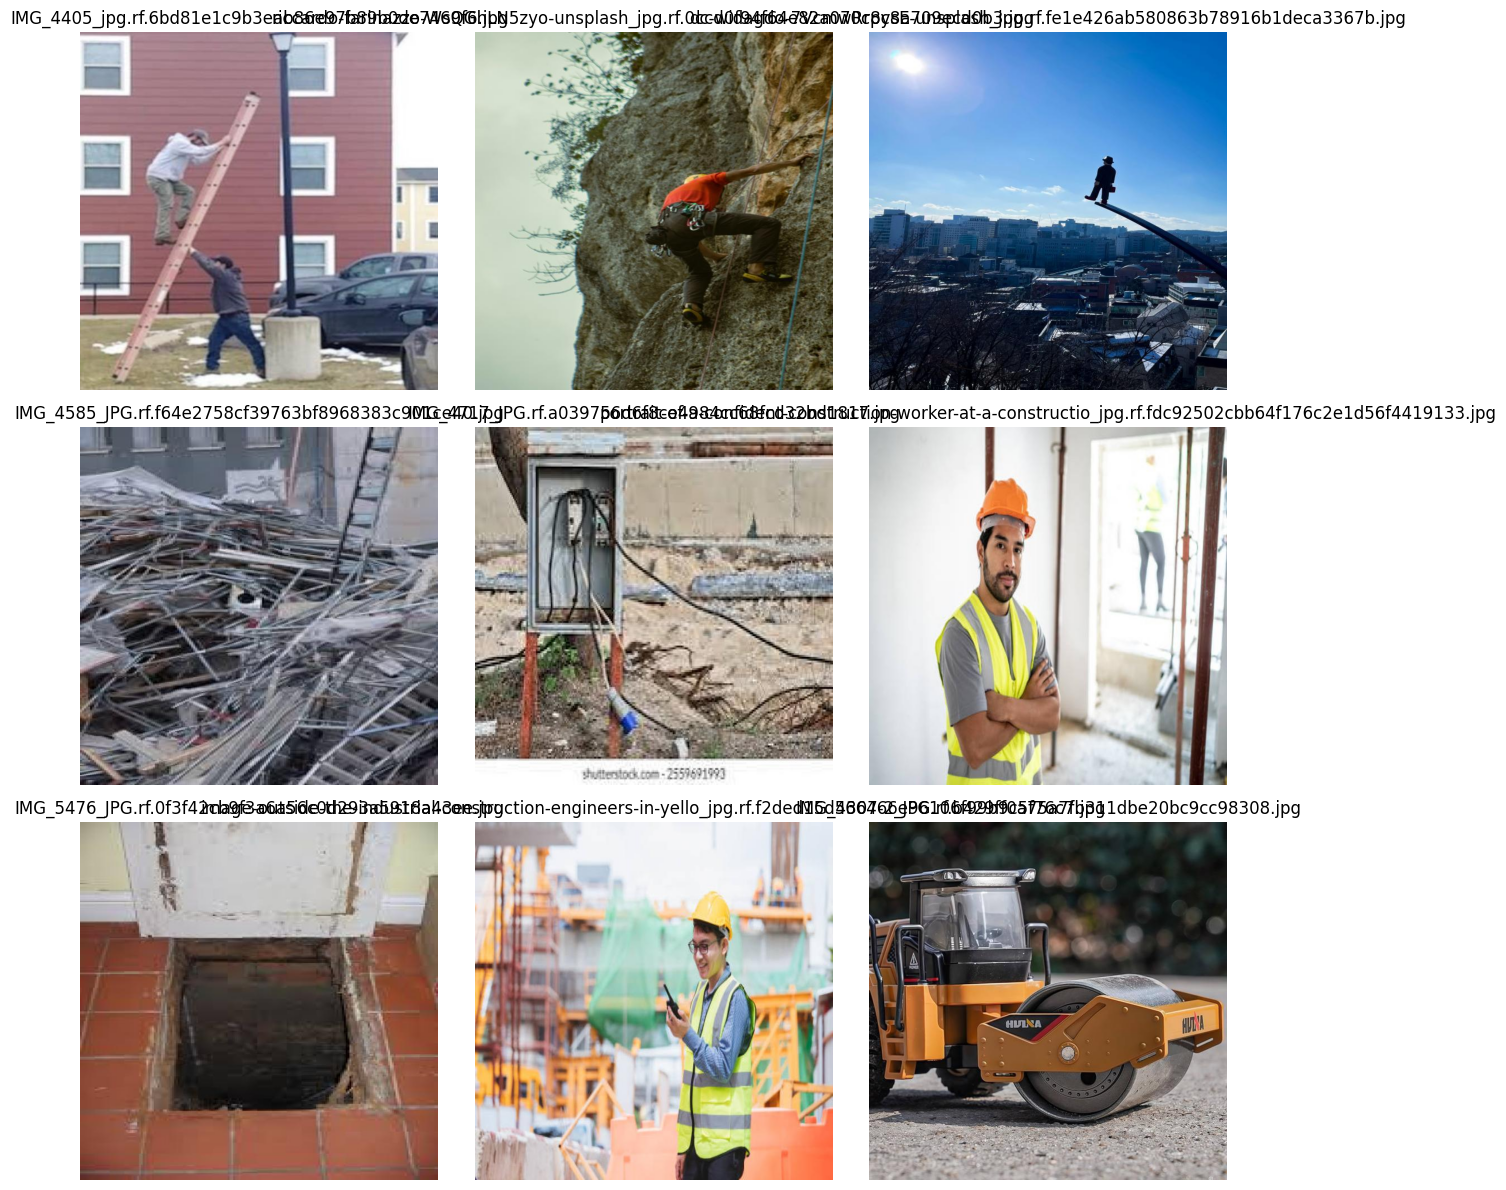

In [7]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# 1. Point this to your images directory
IMG_DIR = '/kaggle/input/latest/train/images'

# 2. List all image files (you can adjust extensions as needed)
all_imgs = [os.path.join(IMG_DIR, f)
            for f in os.listdir(IMG_DIR)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# 3. Pick N random images
N = 9
sample_imgs = random.sample(all_imgs, min(N, len(all_imgs)))

# 4. Plot them in a grid
cols = 3
rows = (len(sample_imgs) + cols - 1) // cols
plt.figure(figsize=(cols * 4, rows * 4))

for i, img_path in enumerate(sample_imgs):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(rows, cols, i + 1)
    ax.imshow(img)
    ax.set_title(os.path.basename(img_path))
    ax.axis('off')

plt.tight_layout()
plt.show()


## Model Training 

## YoloV8s

In [8]:
pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [9]:
from ultralytics import YOLO

# Path to dataset yaml file (YOLO format)
data_yaml = '/kaggle/input/latest/data.yaml'  

# Load pretrained YOLOv5s model (small)
model = YOLO('yolov8s.pt')  # automatically downloads if not present

# Train the model
model.train(
    data=data_yaml,
    epochs=200,
    batch=16,
    imgsz=640,
    device=0  # GPU device number, use 'cpu' if no GPU available
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.155 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/latest/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0,

100%|██████████| 755k/755k [00:00<00:00, 16.6MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

train: Scanning /kaggle/input/latest/train/labels... 936 images, 0 backgrounds, 0 corrupt: 100%|██████████| 936/936 [00:04<00:00, 207.45it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/latest/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.1±0.1 ms, read: 7.5±0.9 MB/s, size: 47.1 KB)


val: Scanning /kaggle/input/latest/valid/labels... 265 images, 0 backgrounds, 0 corrupt: 100%|██████████| 265/265 [00:01<00:00, 186.99it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/latest/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200       3.7G      1.594      4.751      1.856         19        640: 100%|██████████| 59/59 [00:16<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.27it/s]


                   all        265        362      0.402      0.358      0.313      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      4.49G      1.424      2.393      1.715         21        640: 100%|██████████| 59/59 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        265        362      0.297      0.463      0.348      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      4.53G      1.501      2.225      1.745         14        640: 100%|██████████| 59/59 [00:15<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        265        362      0.288      0.369      0.254      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      4.57G       1.52      2.191      1.755         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]

                   all        265        362      0.342      0.376      0.291      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200       4.6G      1.506      2.107       1.76         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]

                   all        265        362      0.529      0.341      0.337      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      4.64G        1.5        2.1      1.761         25        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        265        362      0.378      0.396      0.369      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      4.68G      1.484      2.018      1.744         18        640: 100%|██████████| 59/59 [00:15<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]

                   all        265        362      0.381      0.388      0.309      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      4.71G      1.462      1.967       1.72         25        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]

                   all        265        362      0.334       0.39      0.326      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      4.75G      1.421      1.899        1.7         27        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]

                   all        265        362      0.386      0.448      0.397      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      4.79G      1.461      1.918      1.712         25        640: 100%|██████████| 59/59 [00:15<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]

                   all        265        362      0.527      0.399      0.423      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      4.82G      1.375      1.815      1.692         14        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        265        362      0.403      0.468      0.403      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      4.86G       1.39      1.764      1.679         13        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]

                   all        265        362       0.38      0.422      0.398      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      4.89G      1.395       1.76      1.675         25        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        265        362      0.427      0.466      0.433       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      4.93G      1.339      1.656      1.624         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]

                   all        265        362      0.546      0.467      0.461      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      4.97G      1.351      1.652      1.621         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]

                   all        265        362      0.409      0.493      0.417      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200         5G      1.372      1.673      1.664         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362      0.409      0.469       0.42      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      5.04G      1.329      1.662      1.628         16        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        265        362      0.504      0.524      0.507       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      5.08G      1.297      1.612      1.612         16        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        265        362      0.473      0.544      0.511      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      5.11G       1.31      1.589      1.619         15        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        265        362      0.508      0.565      0.479      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      5.15G      1.273      1.565      1.594         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]

                   all        265        362      0.548      0.508       0.48      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      5.19G       1.29      1.533      1.591         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        265        362      0.435      0.536      0.469      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      5.22G      1.264        1.5      1.577         25        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.69it/s]

                   all        265        362      0.441      0.529      0.504      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      5.26G      1.256      1.493      1.573         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]

                   all        265        362      0.483      0.473      0.497      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      5.29G      1.268      1.427      1.561         18        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]

                   all        265        362       0.58      0.496      0.503      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      5.33G      1.226       1.42       1.53         15        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]

                   all        265        362      0.474      0.548      0.516      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      5.37G      1.224      1.388      1.542         18        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362      0.535      0.588      0.552      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200       5.4G       1.21      1.381       1.53         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.87it/s]

                   all        265        362      0.427      0.558      0.497      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      5.44G      1.182      1.352      1.512         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        265        362      0.507      0.504       0.51      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      5.48G      1.212      1.331       1.49         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]

                   all        265        362      0.567      0.467      0.492      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      5.51G      1.188      1.332      1.507         28        640: 100%|██████████| 59/59 [00:15<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]

                   all        265        362       0.51      0.584      0.517      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      5.55G      1.188      1.314       1.52         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        265        362      0.525      0.484      0.506      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      5.59G      1.166      1.263      1.477         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]

                   all        265        362      0.616      0.483      0.528      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      5.62G      1.174      1.255        1.5         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        265        362      0.546      0.505      0.537       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      5.98G      1.131       1.22       1.46         22        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]

                   all        265        362      0.497      0.618      0.536      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      6.02G      1.144      1.238      1.478         28        640: 100%|██████████| 59/59 [00:15<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        265        362      0.498      0.573      0.516      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      6.05G      1.137      1.196       1.46         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]

                   all        265        362      0.542       0.61      0.573      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      6.09G      1.101       1.15      1.423         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]

                   all        265        362      0.558       0.54      0.539      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      6.13G      1.098      1.155      1.441         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]

                   all        265        362      0.477      0.613      0.556      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      6.16G      1.132      1.192      1.442         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        265        362      0.556      0.591      0.581      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200       6.2G      1.119       1.16      1.437         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.565       0.57      0.577      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      6.24G      1.069      1.127      1.414         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]

                   all        265        362      0.582      0.573      0.573      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      6.27G      1.088      1.099      1.426         31        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]

                   all        265        362      0.634      0.547      0.577      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      6.31G      1.037      1.093      1.394         22        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        265        362      0.454      0.671      0.562      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      6.35G      1.072      1.078      1.407         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]

                   all        265        362      0.538      0.621      0.584      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      6.38G      1.041       1.08        1.4         25        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.64it/s]

                   all        265        362      0.548      0.555      0.554      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      6.42G      1.022      1.054      1.371         22        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]

                   all        265        362      0.627      0.556      0.573      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      6.46G      1.036      1.027      1.388         17        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.87it/s]

                   all        265        362      0.627      0.554      0.549      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      6.49G      1.028      1.057       1.38         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        265        362      0.644      0.544      0.546      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      6.53G       1.02       1.04      1.362         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]

                   all        265        362      0.542      0.534      0.554       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      6.57G      1.012      1.011      1.359         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        265        362      0.572      0.602      0.589      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200       6.6G      1.002      1.043      1.356         26        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362       0.65      0.517      0.574      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      6.67G      1.001     0.9858      1.358         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        265        362      0.513      0.599      0.557      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      6.74G     0.9975     0.9794      1.343         17        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]

                   all        265        362      0.589      0.596      0.556      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      6.78G       1.01     0.9642      1.355         16        640: 100%|██████████| 59/59 [00:15<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.87it/s]

                   all        265        362      0.528      0.621      0.547      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      7.36G     0.9926     0.9805      1.351         25        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        265        362      0.604      0.611      0.609      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      3.88G     0.9624     0.9688      1.328         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]

                   all        265        362      0.626      0.542      0.586      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      4.42G     0.9539     0.9734      1.323         17        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]

                   all        265        362      0.641      0.558      0.581      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      4.42G     0.9352     0.9216      1.313         27        640: 100%|██████████| 59/59 [00:15<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]

                   all        265        362       0.59       0.61      0.606      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      4.42G     0.9284     0.9106      1.318         22        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        265        362      0.571      0.567      0.573      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      4.42G     0.9449     0.9102      1.337         16        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362      0.671      0.572      0.637      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      4.42G     0.9207     0.9098      1.311         15        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]

                   all        265        362       0.62      0.571      0.589      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      4.42G     0.9265     0.9286      1.316         22        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]

                   all        265        362      0.546      0.628      0.602      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      4.43G     0.9242     0.8509      1.285         10        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362       0.58      0.576      0.556      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      4.47G     0.9099     0.8818      1.281         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362      0.603      0.639      0.615      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      4.51G     0.9214      0.875      1.311         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362      0.644      0.603       0.61      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      4.54G     0.9045     0.8546      1.282         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]

                   all        265        362      0.622      0.598      0.603        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      4.58G     0.9081     0.8519      1.293         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        265        362      0.644      0.581      0.609      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      4.62G     0.8932     0.8591      1.275         26        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]

                   all        265        362      0.623      0.597       0.61      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      4.65G     0.8797     0.8277      1.269         17        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.87it/s]

                   all        265        362      0.618      0.547      0.576      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      4.69G     0.8679     0.8307      1.266         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362      0.666      0.606       0.63      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      4.72G     0.8776     0.8316       1.27         26        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]

                   all        265        362      0.616       0.55      0.614      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      4.76G     0.8764     0.8191      1.258         14        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362        0.6      0.549      0.584      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200       4.8G     0.8402     0.7859      1.244         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.632      0.581      0.606      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      4.83G     0.8449     0.7825      1.242         12        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]

                   all        265        362      0.643      0.568      0.601      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      4.87G     0.8581     0.7748      1.248         22        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        265        362      0.634      0.571      0.594      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      4.91G     0.8201     0.7795      1.238         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362      0.733      0.522      0.614      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      4.94G     0.8255      0.747      1.226         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        265        362      0.618      0.564      0.575      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      4.98G     0.8158     0.7683      1.215         38        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.562      0.603      0.568      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      5.01G     0.8039     0.7289      1.215         18        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.87it/s]

                   all        265        362       0.59      0.631      0.604        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      5.05G     0.8312     0.7441      1.223         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]

                   all        265        362      0.628       0.61      0.599      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      5.09G     0.7972     0.7374      1.205         17        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]

                   all        265        362       0.66      0.559      0.608      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      5.12G     0.7858     0.7335      1.211         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        265        362      0.615      0.593      0.593      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      5.16G     0.7839     0.7286      1.208         17        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362      0.613      0.608      0.616       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200       5.2G     0.7948     0.7253      1.211         13        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]

                   all        265        362      0.648      0.595      0.616      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      5.23G     0.7837     0.7218      1.204         14        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        265        362       0.59      0.636      0.608      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      5.59G     0.7796     0.7107      1.196         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]

                   all        265        362      0.639      0.617      0.613       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      5.63G      0.781     0.7226      1.187         26        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362      0.584      0.618      0.586      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      5.66G     0.7684     0.7181      1.185         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]

                   all        265        362      0.608      0.603      0.593      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200       5.7G     0.7602     0.6962      1.195         22        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]

                   all        265        362      0.692      0.626      0.649       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      5.74G     0.7694     0.6978      1.185         18        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]

                   all        265        362      0.629      0.629      0.636      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      5.77G     0.7531     0.7053      1.183         18        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]

                   all        265        362      0.651      0.545      0.616      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      5.81G     0.7644     0.7098      1.195         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]

                   all        265        362      0.692      0.566      0.615      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      5.85G     0.7648     0.6896      1.175         32        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362      0.649      0.587      0.629      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      5.88G     0.7472     0.6782      1.177         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.721      0.565      0.645      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      5.92G     0.7376     0.6739      1.163         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]

                   all        265        362      0.578      0.619      0.613      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      5.95G     0.7264     0.6628      1.164         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]

                   all        265        362      0.586       0.58      0.579      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      5.99G     0.7409     0.6681      1.179         16        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]

                   all        265        362      0.594      0.589      0.585      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      6.06G     0.7282     0.6471      1.168         13        640: 100%|██████████| 59/59 [00:15<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]

                   all        265        362      0.685      0.562       0.63      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      6.13G     0.7153     0.6543      1.146         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362      0.688      0.611      0.631       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200       6.2G     0.7169     0.6532      1.155         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        265        362      0.666      0.594      0.612      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      6.27G     0.7204     0.6703      1.165         16        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]

                   all        265        362      0.688      0.564      0.609      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200       6.3G     0.6949     0.6313      1.135         22        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.87it/s]

                   all        265        362      0.631      0.595      0.605      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      6.38G     0.6842      0.629      1.133         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]

                   all        265        362      0.655      0.587      0.608      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      6.44G     0.6936     0.6101      1.137         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]

                   all        265        362      0.596      0.612      0.611      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      6.51G     0.6936     0.6129      1.133         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362      0.662      0.605      0.612      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      6.58G     0.6921      0.622      1.134         30        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]

                   all        265        362      0.666      0.577      0.611      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      6.65G     0.6939      0.601      1.129         22        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]

                   all        265        362      0.676      0.603      0.627      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      6.69G     0.6801     0.5666      1.125         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]

                   all        265        362      0.619      0.615      0.609      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      6.76G     0.7035     0.5895      1.137         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]

                   all        265        362      0.617      0.603      0.615      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      6.83G     0.7054     0.6078      1.138         18        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        265        362      0.691       0.61       0.62      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200       6.9G     0.6745     0.5986      1.123         22        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        265        362      0.667      0.592      0.604      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      6.97G     0.6508     0.5623      1.099         28        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.87it/s]

                   all        265        362       0.69      0.608      0.635      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      7.04G      0.681     0.6054      1.133         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362      0.645      0.609      0.595      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      7.11G     0.6527     0.5793      1.118         26        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]

                   all        265        362      0.677       0.59      0.594      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      7.14G     0.6482     0.5563      1.102         26        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        265        362      0.613      0.621      0.619      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      7.24G     0.6681     0.5849      1.124         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        265        362      0.652      0.598      0.618      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      7.28G     0.6587     0.5653      1.109         17        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        265        362      0.635       0.61       0.63      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      7.35G     0.6466     0.5561      1.107         15        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.656      0.604      0.632      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      7.42G     0.6382     0.5388      1.103         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        265        362      0.683      0.555      0.613      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      3.91G     0.6205     0.5319       1.09         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]

                   all        265        362      0.634      0.621      0.623      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      3.91G     0.6288     0.5576      1.095         14        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]

                   all        265        362      0.701      0.567      0.638      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      3.91G     0.6223     0.5553      1.095         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362      0.707      0.606      0.648      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      3.91G      0.609     0.5326      1.093         36        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362       0.71      0.575      0.627      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      3.91G       0.64      0.551      1.104         31        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]

                   all        265        362      0.604      0.609      0.623      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      3.91G     0.6209     0.5322      1.088         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.605      0.644       0.61      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      3.91G     0.6112     0.5299      1.086         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.87it/s]

                   all        265        362      0.647      0.625      0.626      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      3.92G     0.6184     0.5444      1.086         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        265        362      0.649      0.641      0.632      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      3.96G     0.5887     0.5036      1.072         25        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]

                   all        265        362      0.597      0.679      0.619      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      3.99G     0.6125     0.5208      1.078         14        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]

                   all        265        362      0.645      0.608      0.614      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      4.06G     0.5969     0.5245      1.081         16        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.661      0.611      0.621      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      4.17G     0.6088      0.525      1.089         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362        0.7      0.574      0.632      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200       4.2G     0.6027     0.5129      1.068         16        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]

                   all        265        362      0.639      0.607      0.617      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      4.24G     0.6069     0.5291      1.078         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]

                   all        265        362      0.674      0.611      0.616      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      4.34G     0.5808     0.5148      1.062         17        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.624       0.62      0.613      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      4.41G     0.5916     0.5278      1.071         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]

                   all        265        362      0.703      0.614      0.628      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      4.48G     0.5934     0.5183      1.077         22        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.676       0.61      0.637      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      4.52G     0.5612     0.4995      1.057         16        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        265        362       0.62      0.622      0.628       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      4.58G     0.5735     0.4913      1.065         33        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.709      0.583      0.636      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      4.65G     0.5812     0.5143      1.071         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.675      0.604      0.632      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      4.72G     0.5605     0.4917       1.07         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]

                   all        265        362      0.703      0.598      0.642      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      4.79G     0.5732     0.4994      1.066         22        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.719      0.581      0.639      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      4.86G     0.5764     0.4951      1.056         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]

                   all        265        362      0.661      0.604      0.636      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      4.93G     0.5538     0.4721      1.053         26        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.675      0.604      0.623      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200         5G     0.5525     0.4674       1.05         17        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362      0.664      0.622      0.627      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      5.04G     0.5488     0.4882      1.049         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]

                   all        265        362      0.729      0.573      0.634      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      5.11G     0.5589     0.4924      1.048         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        265        362      0.671      0.598      0.633      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      5.18G     0.5208     0.4484      1.036         18        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        265        362      0.659       0.61      0.624       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      5.25G     0.5315     0.4427      1.043         28        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]

                   all        265        362      0.756      0.555      0.637      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      5.32G     0.5493     0.4727      1.038         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362      0.691      0.569      0.627      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      5.39G     0.5453     0.4593      1.049         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]

                   all        265        362       0.66      0.647      0.642      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      5.42G     0.5391     0.4433      1.034         15        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]

                   all        265        362      0.672      0.648      0.649      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      5.49G     0.5103     0.4374      1.026         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]

                   all        265        362      0.729      0.591      0.638      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      5.56G     0.5335     0.4586      1.038         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        265        362      0.733      0.579      0.631      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      5.63G     0.5136     0.4395      1.018         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]

                   all        265        362      0.748      0.586      0.644      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200       5.7G     0.5115     0.4382      1.033         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]

                   all        265        362      0.701      0.635      0.653      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      5.77G     0.5358      0.451      1.031         13        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        265        362      0.683       0.65      0.654      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      5.81G     0.5251     0.4405      1.022         18        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        265        362      0.669      0.648      0.662      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      5.88G     0.5201     0.4388      1.028         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]

                   all        265        362      0.678      0.629      0.647      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      5.95G     0.5278     0.4358      1.045         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362      0.724      0.616      0.648      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      6.02G     0.5124     0.4382      1.026         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.69it/s]

                   all        265        362      0.716      0.601      0.641      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      6.09G     0.5063     0.4221       1.02         29        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]

                   all        265        362      0.742      0.605      0.639      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      6.15G      0.513     0.4252      1.024         28        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]

                   all        265        362      0.691      0.648      0.648      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      6.19G     0.5037     0.4413      1.025         15        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]

                   all        265        362       0.69      0.642      0.634      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      6.26G     0.5185     0.4552      1.031         27        640: 100%|██████████| 59/59 [00:15<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.635      0.684      0.649      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200       6.3G     0.4985     0.4225      1.014         26        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        265        362      0.703      0.598      0.626       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200       6.4G     0.5011     0.4071      1.016         29        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]

                   all        265        362      0.689        0.6      0.625      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      6.47G     0.4914      0.418      1.017         10        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]

                   all        265        362      0.682      0.612      0.637      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      6.54G     0.4729     0.4068      1.015         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]

                   all        265        362      0.652       0.63      0.643      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      6.61G     0.4944     0.4076      1.013         24        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        265        362      0.661      0.643      0.653      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      6.64G     0.4807     0.4041      1.012         18        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362      0.695      0.645      0.661      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      6.75G     0.4919     0.4122      1.012         16        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]

                   all        265        362      0.736      0.611       0.65      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      6.78G     0.4817     0.3923      1.008         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]

                   all        265        362      0.715      0.628      0.655      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      6.85G     0.4556     0.3949     0.9994         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]

                   all        265        362      0.677      0.638      0.636       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      6.92G     0.4692     0.3993      1.001         27        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362      0.667      0.626       0.62      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      6.99G     0.4774      0.398      1.005         18        640: 100%|██████████| 59/59 [00:15<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.87it/s]

                   all        265        362      0.699      0.593      0.626      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      7.06G     0.4616     0.3846      1.004         23        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.62it/s]

                   all        265        362      0.724      0.604      0.635      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200       7.1G     0.4756     0.4027      1.004         21        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]

                   all        265        362      0.668      0.619      0.637      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      7.17G     0.4705     0.4007      1.001         30        640: 100%|██████████| 59/59 [00:15<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362      0.628      0.648      0.641      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      7.24G     0.4765     0.4154      1.009         17        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]

                   all        265        362      0.702      0.643      0.634      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      7.31G     0.4546     0.3817     0.9954         20        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]

                   all        265        362      0.697      0.601      0.627      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      7.38G     0.4462     0.3651     0.9908         17        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]

                   all        265        362      0.698      0.631      0.644       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      3.88G      0.454     0.3849      1.006         18        640: 100%|██████████| 59/59 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]

                   all        265        362      0.639      0.644      0.627      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      3.88G     0.4655     0.4041      1.003         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]

                   all        265        362      0.693      0.603       0.63      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      3.88G     0.4518     0.3767     0.9834         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362       0.68      0.629       0.64      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      3.88G     0.4515     0.3803     0.9954         25        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        265        362      0.685      0.626      0.629      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      3.88G     0.4571     0.3832     0.9885         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        265        362      0.669      0.628      0.623      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      3.88G     0.4695     0.3912     0.9975         22        640: 100%|██████████| 59/59 [00:15<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]

                   all        265        362      0.705      0.596       0.63      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      3.88G     0.4548     0.3728     0.9999         16        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]

                   all        265        362      0.694      0.636      0.636      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      3.92G     0.4553     0.3699     0.9929         30        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]

                   all        265        362      0.682      0.646      0.641      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      3.95G     0.4454     0.3774     0.9977         19        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]

                   all        265        362      0.707      0.638      0.648      0.327


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      4.12G     0.4279     0.3202     0.9803          9        640: 100%|██████████| 59/59 [00:16<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        265        362      0.681      0.605        0.6      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      4.16G     0.3998     0.2839     0.9627         14        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]

                   all        265        362      0.648      0.643      0.611      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200       4.2G      0.403     0.2758     0.9598         10        640: 100%|██████████| 59/59 [00:15<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]

                   all        265        362      0.711      0.619      0.629      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      4.23G     0.3823     0.2722     0.9496         13        640: 100%|██████████| 59/59 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362      0.718      0.597       0.62      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      4.27G     0.3863      0.265     0.9583          9        640: 100%|██████████| 59/59 [00:15<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]

                   all        265        362      0.695      0.624      0.629      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      4.37G     0.3756     0.2687     0.9499          9        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]

                   all        265        362      0.699      0.632      0.638      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      4.45G      0.389     0.2639     0.9676         11        640: 100%|██████████| 59/59 [00:15<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]

                   all        265        362       0.71      0.627      0.639      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      4.48G     0.3702     0.2584      0.958          8        640: 100%|██████████| 59/59 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        265        362      0.703      0.623      0.639      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      4.51G     0.3696     0.2585     0.9473         12        640: 100%|██████████| 59/59 [00:15<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]

                   all        265        362        0.7      0.623      0.635       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      4.62G     0.3715     0.2619     0.9438         14        640: 100%|██████████| 59/59 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]

                   all        265        362      0.708      0.623      0.642      0.329



200 epochs completed in 1.004 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        265        362      0.697      0.645      0.661      0.342
Fall Hazard -Open Edge-         26         31      0.703      0.387      0.546      0.275
            cell-phone         48         48      0.842      0.667      0.741      0.392
  construction-machine         36         39      0.593      0.487       0.42      0.256
    no-fall-protection         42         47      0.506      0.362      0.396      0.177
             no-helmet         40         40       0.86      0.768      0.814       0.35
     no-safety-glasses         59         60      0.762      0.933       0.85      0.396
        no-safety-vest         17         17      0.599      0.588       0.63      0.355
           safe-ladder         10         12      0.757      0.833       0.79      0.417
             site-mess         20         22      0.721      0.588      0.607      0.432
         unsafe-ladder         18         18      0.506      0.556      0.574      0.172
unsecure-electrical-

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc8131ece50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

## Model's Predictions 


image 1/1 /kaggle/input/latest/test/images/IMG_5411_JPG.rf.e727f8ae51a80b508ee3d42199abfa80.jpg: 640x640 1 Fall Hazard -Open Edge-, 16.5ms
Speed: 1.7ms preprocess, 16.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


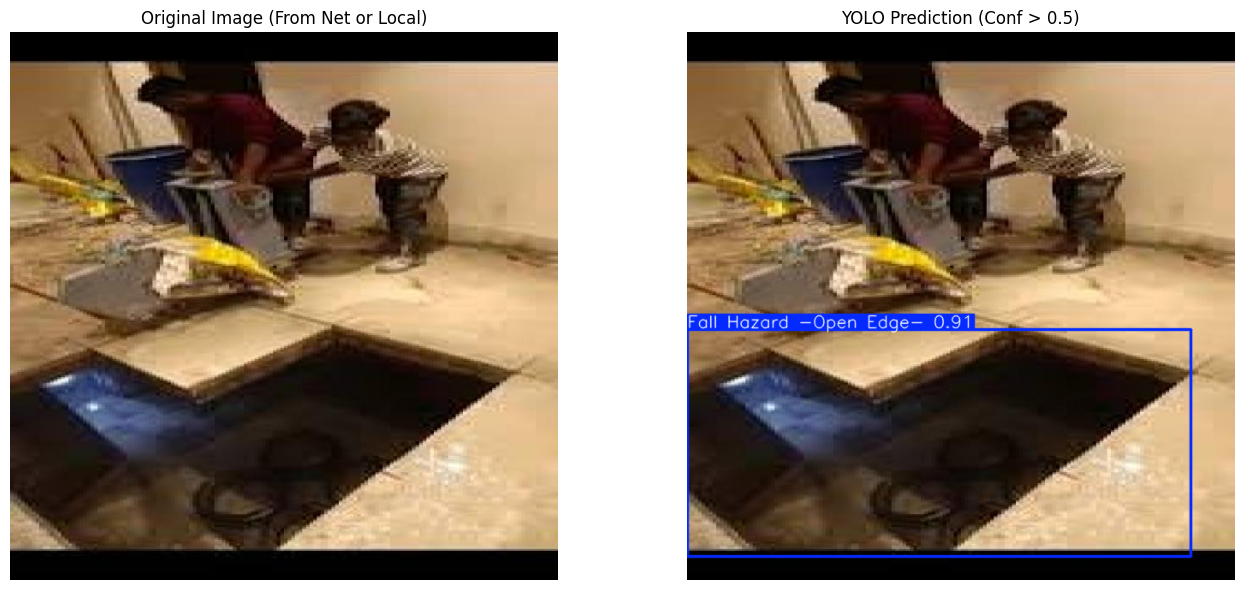

In [24]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# ------------- CONFIG ----------------
image_path = '/kaggle/input/latest/test/images/IMG_5411_JPG.rf.e727f8ae51a80b508ee3d42199abfa80.jpg'  # 🟢 Replace with your image path
model_path = '/kaggle/working/runs/detect/train2/weights/best.pt'
conf_threshold = 0.5

# ------------- LOAD IMAGE ----------------
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at path: {image_path}")

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ------------- LOAD YOLO MODEL ------------
model = YOLO(model_path)

# ------------- PREDICT --------------------
results = model.predict(image_path, conf=conf_threshold)
pred_img = results[0].plot()
pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

# ------------- SHOW BOTH ------------------
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image (From Net or Local)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pred_img)
plt.title(f'YOLO Prediction (Conf > {conf_threshold})')
plt.axis('off')

plt.tight_layout()
plt.show()
